In [14]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from src.download import *
from src.analysis import *
from src.visualization import *

# Download

In [15]:
# get_data()  # pobieranie danych do ./real_fake/Fake.csv, ./real_fake/True.csv
# truncate_data(["Fake", "True"])  # truncate data to 5000 sample
# combine_datasets()  # combine fake and true into one dataset

# Analysis and preprocessing

In [16]:
data = pd.read_csv("./real_fake/Data_short.csv", parse_dates=['datetime'])

In [17]:
data = add_date_info(add_day_of_week, add_month_of_year, add_words_count)(data.copy())

In [18]:
data.head()

,title,text,subject,date,is_true,datetime,title_trump,title_video,title_u.s.,title_says,...,text_have,text_not,text_are,text_who,text_would,text_we,text_u.s.,text_president,month,weekday
0,u.s. house committee 'may reconsider' who canc...,london (reuters) - u.s. congressional committe...,politicsNews,"December 8, 2017",1,2017-12-08,0,0,1,0,...,0,3,3,1,1,6,11,0,12,4
1,'congratulations': eu moves to brexit phase tw...,brussels (reuters) - the european union agreed...,worldnews,"December 15, 2017",1,2017-12-15,0,0,0,0,...,5,5,5,3,8,9,13,0,12,4
2,white house aides told to preserve materials i...,washington (reuters) - the white house counsel...,politicsNews,"March 2, 2017",1,2017-03-02,0,0,1,0,...,2,0,1,1,0,4,10,2,3,3
3,u.s. 'very concerned' by violence around iraq'...,washington (reuters) - the u.s. state departme...,worldnews,"October 16, 2017",1,2017-10-16,0,0,1,0,...,0,0,1,0,0,1,1,0,10,0
4,obama's move on gender pay gap seen as first s...,new york (reuters) - advocates fighting to clo...,politicsNews,"February 5, 2016",1,2016-02-05,0,0,0,0,...,2,4,2,0,4,3,4,2,2,4


In [19]:
data.describe()

,is_true,datetime,title_trump,title_video,title_u.s.,title_says,title_house,title_obama,title_new,title_white,...,text_have,text_not,text_are,text_who,text_would,text_we,text_u.s.,text_president,month,weekday
count,9473.000000,9473,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,...,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000,9473.000000
mean,0.527816,2017-03-02 05:16:29.211442944,0.354798,0.170273,0.226433,0.083817,0.048242,0.071677,0.067244,0.040114,...,1.820648,2.353742,2.844294,1.690278,1.287660,5.627995,4.394806,1.648580,7.211443,2.725430
min,0.000000,2016-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2016-08-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
50%,1.000000,2017-03-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,8.000000,3.000000
75%,1.000000,2017-09-30 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,4.000000,2.000000,2.000000,8.000000,6.000000,2.000000,10.000000,4.000000
max,1.000000,2017-12-30 00:00:00,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,47.000000,48.000000,79.000000,39.000000,70.000000,128.000000,84.000000,58.000000,12.000000,6.000000
std,0.499252,NaN,0.503212,0.387782,0.478342,0.277889,0.220122,0.267214,0.264001,0.202590,...,2.258016,2.723684,3.793962,2.185624,2.042546,5.646123,5.154798,2.418414,3.558919,1.832596


# Visualization

Saved plot to: plots/count_of_appearances_for_each_subject.png  :)


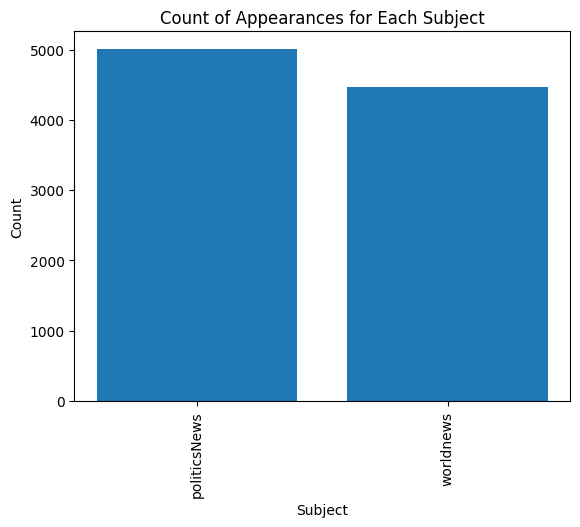

In [20]:
plot_histogram_of_subject(data)

/Users/sebastiansukiennik/Desktop/zpwp/project-git/src/visualization.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(["day_of_week", "is_true"]).size().unstack().fillna(0)


Saved plot to: plots/count_of_real_and_fake_news_for_each_day_of_the_week.png  :)


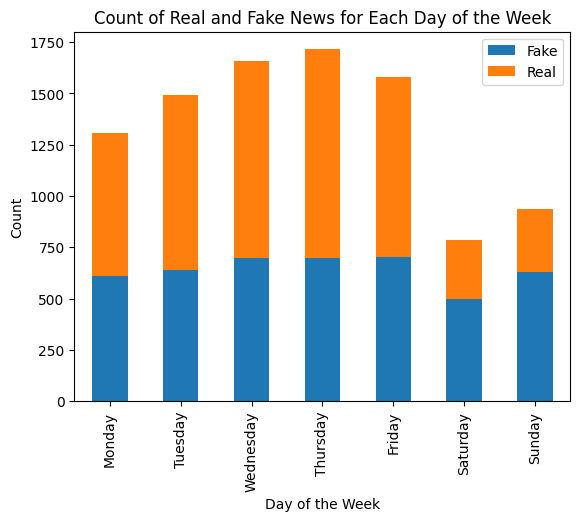

In [21]:
plot_real_fake_news_by_weekday(data)

Saved plot to: plots/count_of_real_and_fake_news_for_each_month_(excluding_2015).png  :)


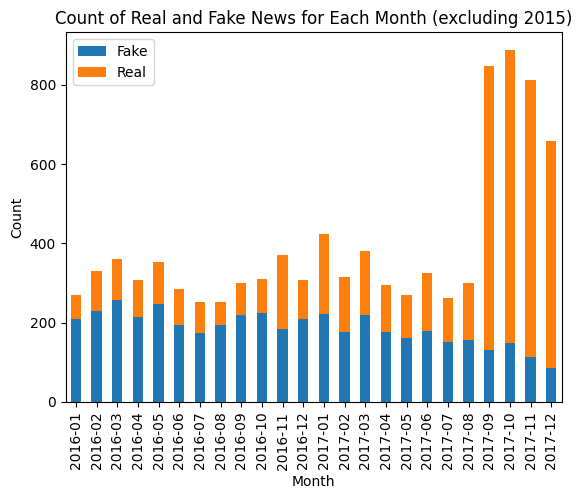

In [22]:
plot_real_fake_news_by_month(data)

Saved plot to: plots/count_of_10_most_frequent_words_in_title.png  :)


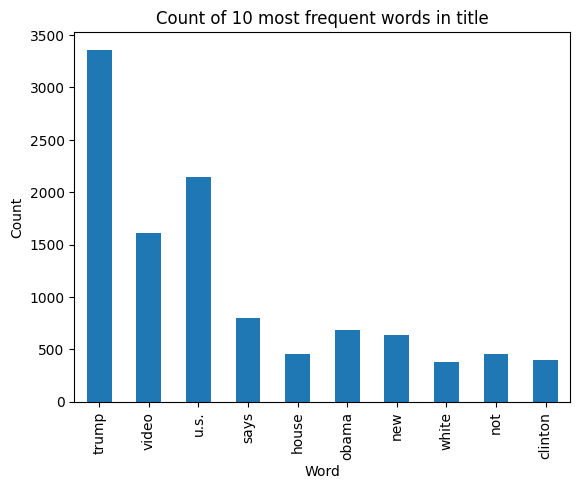

In [23]:
plot_most_frequent_words_in_column(data, column="title")

Saved plot to: plots/count_of_10_most_frequent_words_in_text.png  :)


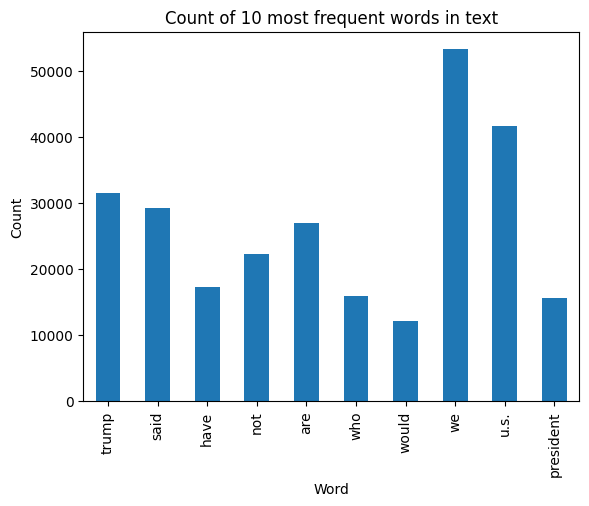

In [24]:
plot_most_frequent_words_in_column(data, column="text")

In [25]:
def plot_number_of_news_per_day(data: pd.DataFrame):
    """
    Plots how many times word has occured in column.
    """
    data = data.loc[data["datetime"].dt.year != 2015]
    data["day"] = data["datetime"].dt.to_period("D")
    result = data.groupby(["day", "is_true"]).size().unstack().fillna(0)

    # Plot the data
    result.plot(kind="line", stacked=True)
    plt.title("Count of Real and Fake News for each day")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.legend(["Fake", "Real"])
    save_plot(plt)
    plt.show()

Saved plot to: plots/count_of_real_and_fake_news_for_each_day.png  :)


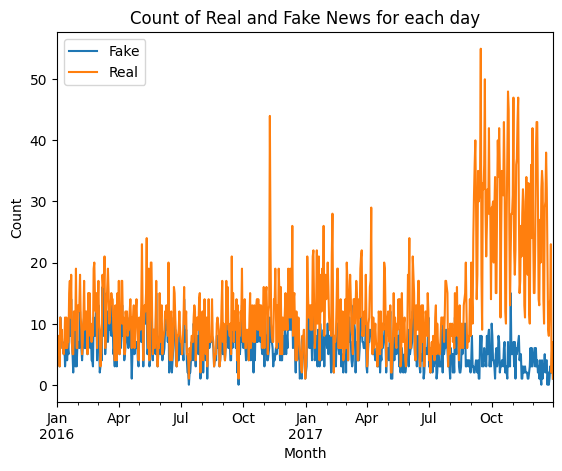

In [26]:
plot_number_of_news_per_day(data)

## Korelacja liczby zmiennych, z liczbą fake newsów

Saved plot to: plots/correlation_between_'title'_words_frequency.png  :)


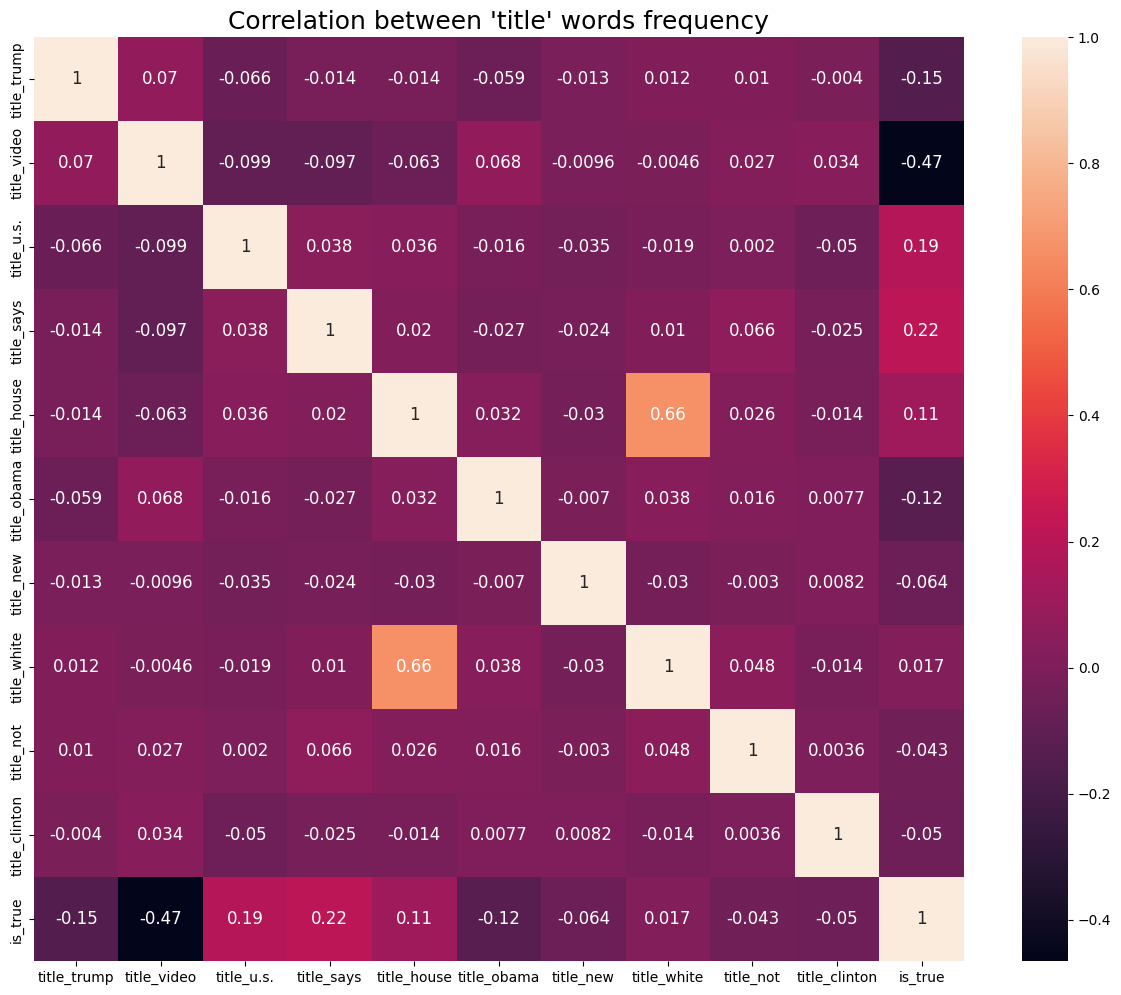

In [27]:
plot_correlation_between_set_set_of_columns(data, "title")

Saved plot to: plots/correlation_between_'text'_words_frequency.png  :)


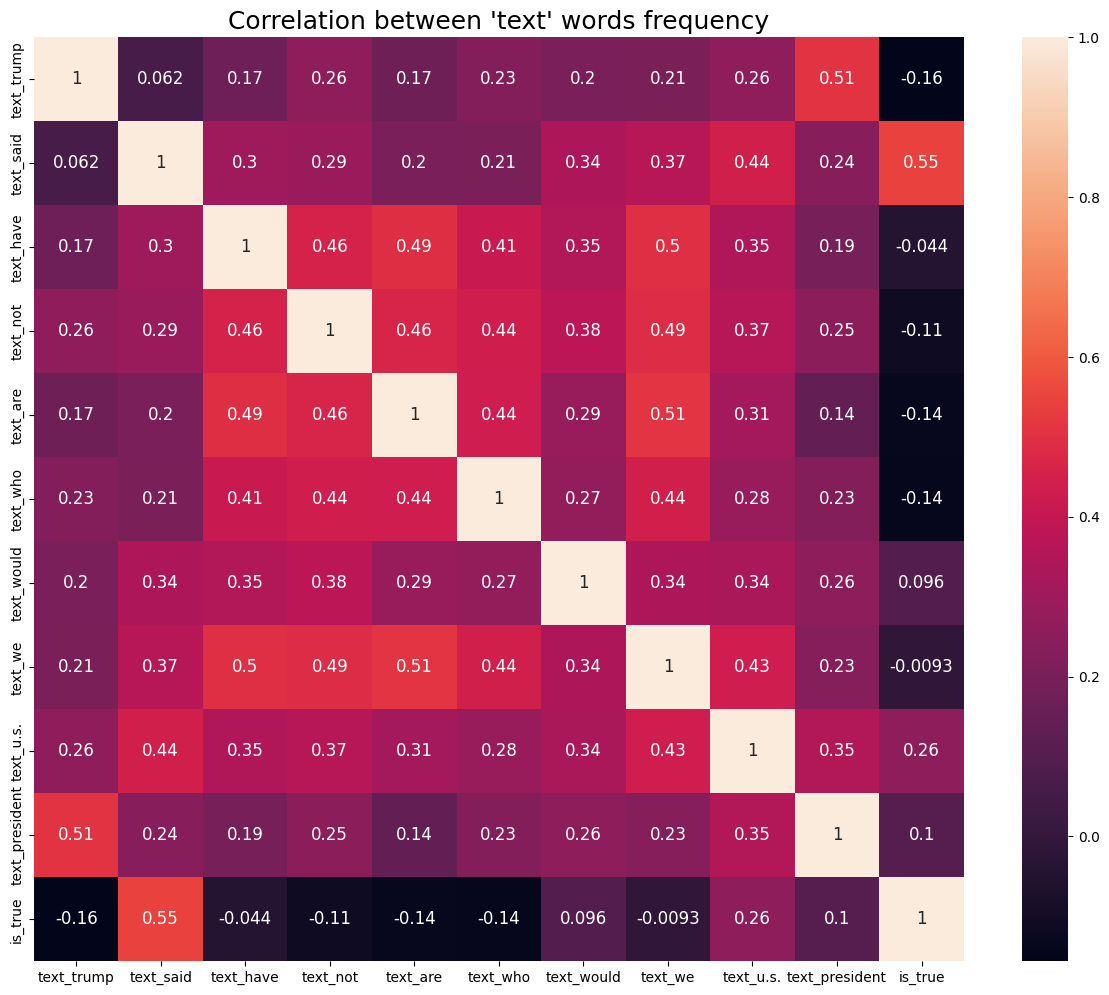

In [28]:
plot_correlation_between_set_set_of_columns(data, "text")

## 

## Decission Tree Model

In [29]:
data_numeric = data.drop(columns=['title', 'text', 'subject', 'date', 'datetime', 'day_of_week'])

In [30]:
train_x, test_x, train_y, test_y = get_train_test(data_numeric, label="is_true", random=False)

# create, fit and predict model
tree = DecisionTreeClassifier(max_depth=17, class_weight="balanced")
tree.fit(train_x, train_y)
pred_y_train = tree.predict(train_x)  # predykcja na zbiorze train
pred_y_test = tree.predict(test_x)  # predykcja na zbiorze test

Saved plot to: plots/confustion_matrix_for_train_set.png  :)


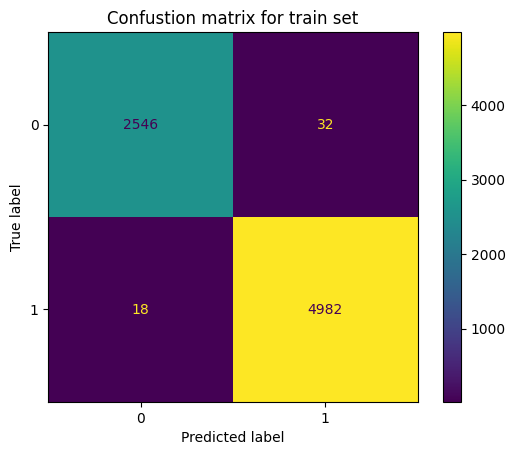

In [31]:
plot_confusion_matrix(y_true=train_y, y_pred=pred_y_train, set_type="train")

Saved plot to: plots/confustion_matrix_for_test_set.png  :)


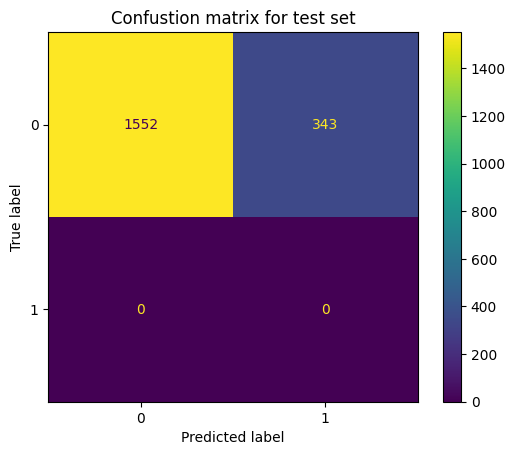

In [32]:
plot_confusion_matrix(y_true=test_y, y_pred=pred_y_test, set_type="test")